In [17]:
# report.ipynb

# 📊 基础库
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体为系统字体（Mac 上一般是 "Songti SC" 或 "Heiti SC"）
rcParams['font.sans-serif'] = ['Songti SC']  # 或者 'Heiti SC'
rcParams['axes.unicode_minus'] = False       # 正确显示负号

# 📂 路径配置
BASE_DIR = Path.cwd().parent  # Notebook在 scripts/ 下
DATA_DIR = BASE_DIR / "data"

# 选择要分析的月份
month = "2025-08"
data_file = DATA_DIR / f"{month}.csv"

# 读取数据
df = pd.read_csv(data_file)
df


,date,category,amount,type,note
0,2025-08-29,餐饮,30.0,expense,午餐
1,2025-08-29,餐饮,30.0,expense,午餐
2,2025-08-29,生活费,1000.0,income,生活费
3,2025-08-29,餐饮,300.0,expense,晚餐
4,2025-08-29,恋爱,520.0,expense,恋爱


In [18]:
# 转换日期
df["date"] = pd.to_datetime(df["date"])

# 按类型汇总金额
income_total = df[df["type"]=="income"]["amount"].sum()
expense_total = df[df["type"]=="expense"]["amount"].sum()
net_total = income_total - expense_total

print(f"📊 {month} 收入/支出汇总:")
print(f"收入: {income_total} 元")
print(f"支出: {expense_total} 元")
print(f"净额: {net_total} 元")


📊 2025-08 收入/支出汇总:
收入: 1000.0 元
支出: 880.0 元
净额: 120.0 元


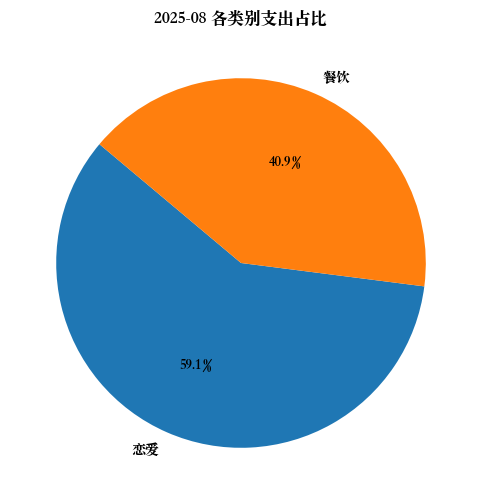

In [19]:
# 支出各类别饼图
expense_summary = df[df["type"]=="expense"].groupby("category")["amount"].sum()

plt.figure(figsize=(6,6))
plt.pie(expense_summary, labels=expense_summary.index, autopct="%1.1f%%", startangle=140)
plt.title(f"{month} 各类别支出占比")
plt.show()


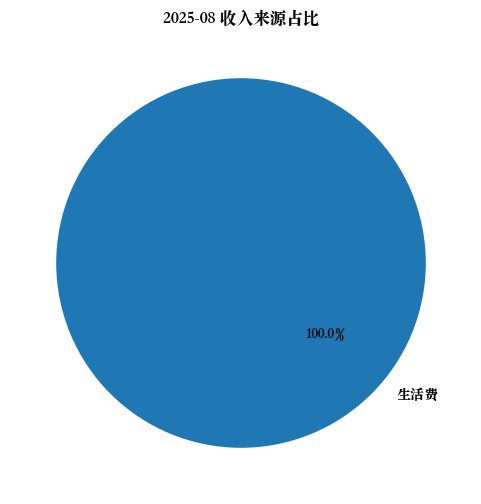

In [20]:
# 收入来源饼图
income_summary = df[df["type"]=="income"].groupby("category")["amount"].sum()

plt.figure(figsize=(6,6))
plt.pie(income_summary, labels=income_summary.index, autopct="%1.1f%%", startangle=140)
plt.title(f"{month} 收入来源占比")
plt.show()


/var/folders/2w/qhjh2rsx4f77ylplm1rt7wmr0000gn/T/ipykernel_68385/3261594225.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily = df.groupby("date").apply(


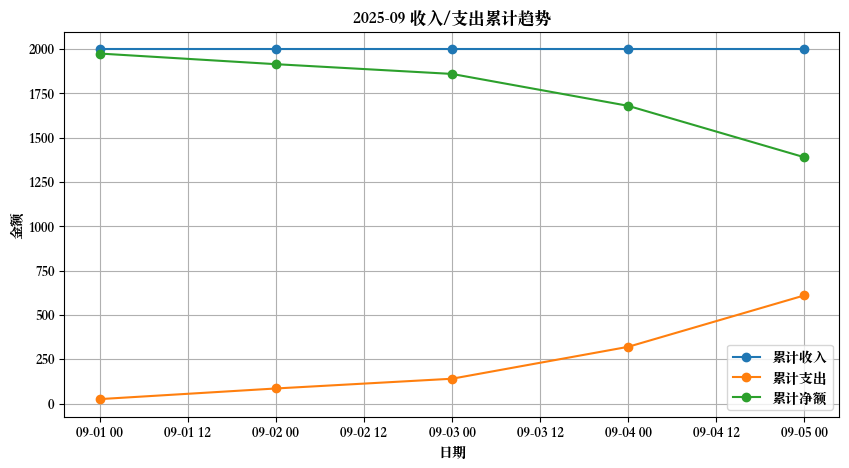

In [10]:
# 累计趋势图（收入/支出/净额）
daily = df.groupby("date").apply(
    lambda x: pd.Series({
        "income": x[x["type"]=="income"]["amount"].sum(),
        "expense": x[x["type"]=="expense"]["amount"].sum()
    })
).sort_index()

daily["net"] = daily["income"] - daily["expense"]
daily_cum = daily.cumsum()

plt.figure(figsize=(10,5))
plt.plot(daily_cum.index, daily_cum["income"], marker="o", label="累计收入")
plt.plot(daily_cum.index, daily_cum["expense"], marker="o", label="累计支出")
plt.plot(daily_cum.index, daily_cum["net"], marker="o", label="累计净额")
plt.title(f"{month} 收入/支出累计趋势")
plt.xlabel("日期")
plt.ylabel("金额")
plt.grid(True)
plt.legend()
plt.show()
